<a href="https://colab.research.google.com/github/lmcanavals/data_mining/blob/main/notebooks/ab_datawarehouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
BASE="https://raw.githubusercontent.com/lmcanavals/data_mining/main/data/"
PRODUCTS_CSV=f"{BASE}products.csv"
WEB_ORDERS_CSV=f"{BASE}web_orders.csv"
CATALOG_ORDERS_CSV=f"{BASE}catalog_orders.csv"

In [40]:
catalog = pd.read_csv(CATALOG_ORDERS_CSV)
catalog.head()

,ID,INV,DATE,CATALOG,PCODE,QTY,custnum
0,1,107707,3/97/7 00:00:00,Sports,SP1000,1,1242
1,2,110633,3/97/25 00:00:00,Gardening,GD2200,1,1243
2,3,111155,3/97/28 00:00:00,Pets,PT1300,3,1244
3,4,126867,6/97/22 00:00:00,Toys,TY4100,1,1245
4,5,135872,8/97/8 00:00:00,Toys,TY1200,4,1246


In [4]:
print(len(catalog))

6767


La columna QTY tiene algunos valores `NaN` y espacio en blanco, por lo que es considerada una fila de tipo `obj` o `string`, reemplazamos los `NaN` con 0.0 con la función `fillna`, in place y los espacios en blanco con 0.0 filtrando.

In [17]:
#catalog.fillna(0.0, inplace=True)
#catalog[catalog['QTY'] == ' '] = 0.0

Ahora podemos convertir QTY a float64 con la función `astype`

In [18]:
#catalog['QTY'] = catalog['QTY'].astype('float64')
#catalog['QTY'].unique()

In [41]:
for column in catalog:
  print(f"Column: {column:10}dtype={catalog[column].dtype}")
  if catalog[column].dtype in ['int', 'float64']:
    print(f"{np.min(catalog[column])}-{np.max(catalog[column])}  var={np.var(catalog[column])}")
  
  print(len(catalog[column].unique()))

Column: ID        dtype=int64
1-6767  var=3816024.0
6767
Column: INV       dtype=int64
98689-243377  var=1607111189.5751636
1711
Column: DATE      dtype=object
1019
Column: CATALOG   dtype=object
7
Column: PCODE     dtype=object
225
Column: QTY       dtype=int64
0-4  var=1.0552421172917852
5
Column: custnum   dtype=int64
2-13789000  var=22067114410619.76
3164


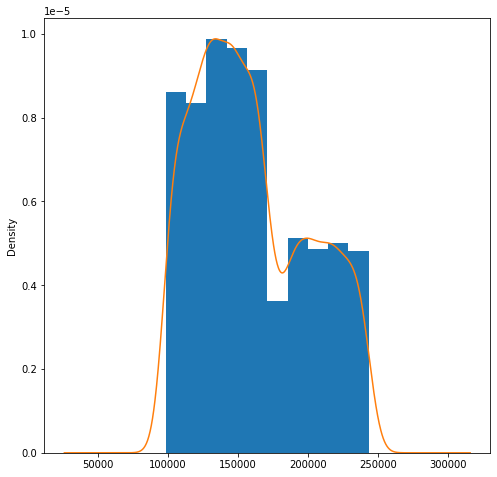

In [42]:
ax = catalog['INV'].plot.hist(density=True, figsize=(8, 8))
catalog['INV'].plot.density(ax=ax)

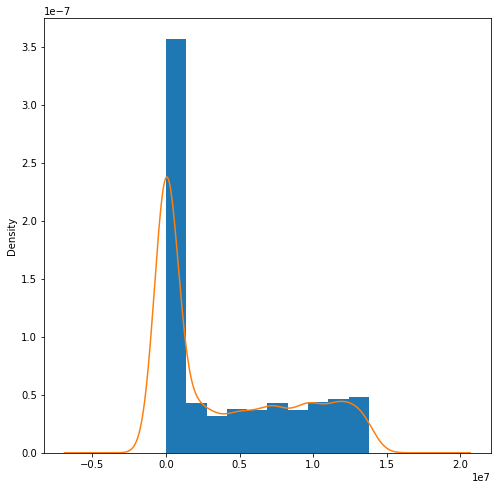

In [43]:
ax = catalog['custnum'].plot.hist(density=True, figsize=(8, 8))
catalog['custnum'].plot.density(ax=ax)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


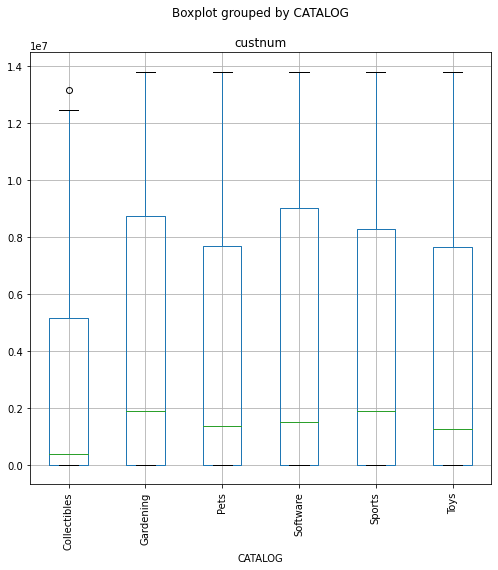

In [44]:
ax = catalog.boxplot(by="CATALOG", column='custnum', figsize=(8, 8))
plt.xticks(rotation='vertical')
plt.show()

Integrando data para Datawarehouse (ojo, notebook no es la herramienta ideal para trabajar datawarehouse)

In [54]:
products = pd.read_csv(PRODUCTS_CSV)
weborders = pd.read_csv(WEB_ORDERS_CSV, sep=';')

In [45]:
catalog.head()

,ID,INV,DATE,CATALOG,PCODE,QTY,custnum
0,1,107707,3/97/7 00:00:00,Sports,SP1000,1,1242
1,2,110633,3/97/25 00:00:00,Gardening,GD2200,1,1243
2,3,111155,3/97/28 00:00:00,Pets,PT1300,3,1244
3,4,126867,6/97/22 00:00:00,Toys,TY4100,1,1245
4,5,135872,8/97/8 00:00:00,Toys,TY1200,4,1246


In [48]:
products.head()

,ID,TYPE,DESCRIP,PRICE,COST,PCODE,supplier
0,1,Database,Track-It-All,560.00,425.0,SW1005,"Software America, Inc."
1,2,Database,Omnibus,499.95,450.0,SW1207,Software America
2,3,Database,Balboa,499.00,300.0,SW3049,Software America
3,4,Financial,Stock Market Analyst,69.95,45.0,SW2842,Software America
4,5,Financial,Tax Relief (Version 10.40),77.95,54.5,SW4187,Software America


In [55]:
weborders.head()

,,,,,,"ID,""INV"",""DATE"",""CATALOG"",""PCODE"",""QTY"",""custnum"""
1,2513000.0,GD3200,17/12/2000 00:00:00,Gardening,3.0,"Rifkin, Mr. Bob"
2,2513000.0,PT1400,6/1/2001 00:00:00,Pets,1.0,"Rifkin, Mr. Bob"
3,2513000.0,PT2000,6/1/2001 00:00:00,Pet,1.0,"Rifkin, Mr. Bob"
4,2513000.0,PT2100,6/1/2001 00:00:00,Pets,1.0,"Rifkin, Mr. Bob"
5,2513000.0,PT2OOO,27/7/2000 00:00:00,Pets,4.0,"Rifkin, Mr. Bob"
